In [1]:
import numpy as np

In [2]:
class Perceptron:
    def __init__(self, x, y, max_iter, lr=1):
        self.x = x
        self.y = y
        # self.w = np.ones((x.shape[1]))
        self.w = np.zeros((x.shape[1]))
        self.max_iter = max_iter
        self.lr = 0.01
        self.current_iter = 1

    def predict(self, x):
        predictions = np.dot(x, self.w)
        
        predictions[predictions >= 0] = 1
        predictions[predictions < 0] = -1 
        
        return predictions
    
    def _update_weights(self, x_n, y_n):
        self.w = self.w + self.lr * y_n * x_n
        
    def _calculate_error(self,  predictions):
        error = np.sum(predictions != self.y)
        return error
        
    def train(self):
        while self.current_iter < self.max_iter: # Check if reached max iterations
            predictions = self.predict(self.x)
            print(predictions)
            self.current_error = self._calculate_error(predictions)
            if self.current_error == 0:
                break
            for i, row in enumerate(predictions): # Find a misclassified example
                if predictions[i] != self.y[i]:
                    self._update_weights(self.x[i], self.y[i])
                    break # Stop once a misclassified example is found
            self.current_iter +=1

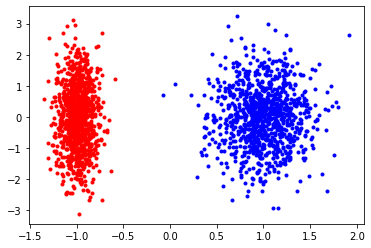

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# From https://stackoverflow.com/questions/47961536/how-to-generate-linear-separable-dataset-by-using-sklearn-datasets-make-classifi
separable = False
while not separable:
    samples = make_classification(n_samples=2000, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
    red = samples[0][samples[1] == 0]
    blue = samples[0][samples[1] == 1]
    separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.show()

In [4]:
x = samples

In [5]:
x = samples[0]
ones = np.ones((x.shape[0], 1))
x = np.concatenate((x, ones), axis=1)
y = samples[1]
y[y == 0] = -1

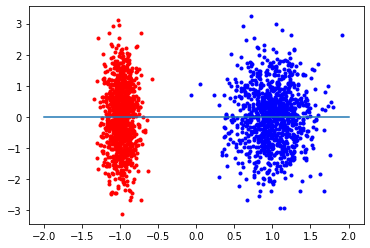

In [6]:
perceptron = Perceptron(x, y, 2000)
# perceptron.train()

weights = perceptron.w
z = np.linspace(-2, 2)
line = -1 * 0 * z - 0
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.plot(z, line)
plt.show()

In [7]:
perceptron.train()

[1. 1. 1. ... 1. 1. 1.]
[-1.  1. -1. ... -1. -1. -1.]
[ 1.  1. -1. ...  1. -1.  1.]
[ 1.  1. -1. ...  1. -1.  1.]
[1. 1. 1. ... 1. 1. 1.]
[ 1.  1. -1. ...  1. -1.  1.]
[ 1.  1. -1. ...  1. -1.  1.]
[ 1.  1. -1. ...  1. -1.  1.]
[ 1.  1. -1. ...  1. -1.  1.]
[ 1.  1. -1. ...  1. -1.  1.]
[ 1.  1. -1. ...  1. -1.  1.]
[ 1.  1. -1. ...  1. -1.  1.]


In [8]:
outputs = perceptron.predict(x)

In [9]:
np.sum(outputs == y)

2000

In [10]:
y

array([ 1,  1, -1, ...,  1, -1,  1])

In [11]:
outputs

array([ 1.,  1., -1., ...,  1., -1.,  1.])

In [12]:
perceptron.current_iter

12

In [13]:
class Adaline:
    def __init__(self, x, y, max_iter, lr=1):
        self.x = x
        self.y = y
        self.w = np.ones((x.shape[1]))
        self.max_iter = max_iter
        self.lr = 0.01
        self.current_iter = 1

    def predict(self, x):
        signal = np.dot(x, self.w)
        predictions = signal
        predictions[predictions > 0] = 1
        predictions[predictions < 0] = -1 
        
        return signal, predictions
    
    def _update_weights(self, x_n, y_n, s_n):
        self.w = self.w + self.lr * (y_n - s_n) * x_n
        
    def _calculate_error(self,  predictions):
        error = np.sum(predictions != self.y)
        return error
        
    def train(self):
        while self.current_iter < self.max_iter: # Check if reached max iterations
            signal, predictions = self.predict(self.x)
            self.current_error = self._calculate_error(predictions)
            if self.current_error == 0:
                break
            for i, row in enumerate(signal): # Find a misclassified example
                if signal[i] * self.y[i] < 0:
                    self._update_weights(self.x[i], self.y[i], signal[i])
                    break # Stop once a misclassified example is found
            self.current_iter +=1

In [14]:
adaline = Adaline(x, y, 2000)
adaline.train()
outputs = perceptron.predict(x)
print(np.sum(outputs == y))
print(adaline.current_iter)

2000
25


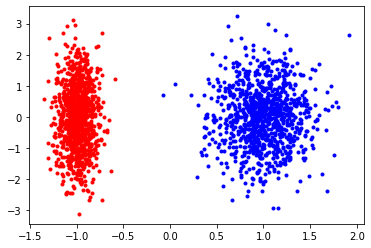

In [15]:
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.show()

In [16]:
weights = perceptron.w

In [17]:
z = np.linspace(-2, 2)

In [18]:
line = -1 * weights[0]/weights[1] * z - weights[2]/weights[1]

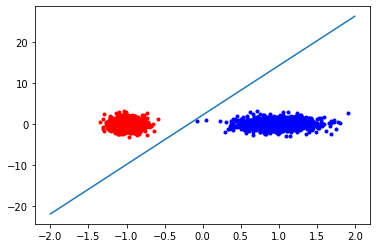

In [19]:
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.plot(z, line)
plt.show()

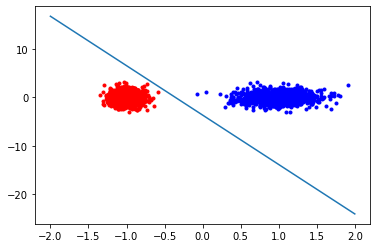

In [20]:
weights = adaline.w
line = -1 * weights[0]/weights[1] * z - weights[2]/weights[1]
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.plot(z, line)
plt.show()